# Neural Net Regression to predict different species of Iris flowers

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
import pathlib
from tensorflow.keras import regularizers
%matplotlib inline

In [2]:
df = pd.read_csv("IRIS.csv")
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Desciption of Data

## SepalLength - Length of the sepal (in cm)
## SepalWidth - Width of the sepal (in cm)
## PetalLength - Length of the petal (in cm)
## PetalWidth - Width of the petal (in cm)
## Species - Species name

In [3]:
# reasigning qualitative values with quantitative values to be passed through the model
df = df.replace('Iris-setosa',1)
df = df.replace('Iris-versicolor',2)
df = df.replace('Iris-virginica',3)


df['species'].unique() # displays all unique values in a column

array([1, 2, 3], dtype=int64)

In [4]:
train_df = df.sample(frac=0.7,random_state=0)
test_df = df.drop(train_df.index)
train_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,3
62,6.0,2.2,4.0,1.0,2
33,5.5,4.2,1.4,0.2,1


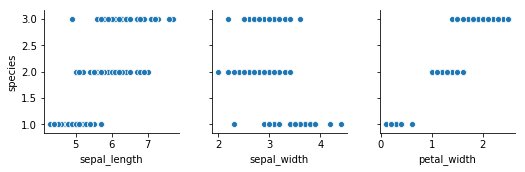

In [5]:

sns.pairplot(train_df, y_vars=[ "species"], x_vars=["sepal_length","sepal_width", "petal_width"], diag_kind="kde")


In [6]:
train_stats = train_df.describe()
train_stats.pop("species")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
sepal_length,105.0,5.819048,0.807072,4.3,5.1,5.8,6.4,7.7
sepal_width,105.0,3.033333,0.437578,2.0,2.8,3.0,3.3,4.4
petal_length,105.0,3.820000,1.721772,1.0,1.6,4.5,5.1,6.6
petal_width,105.0,1.236190,0.752831,0.1,0.3,1.4,1.8,2.5


In [7]:
#tf = train_stats.describe()
#tf = train_df.transpose()
#tf
train_labels = train_df.pop("species")
test_labels = test_df.pop("species")

In [8]:
# normalizing the data before training the model

def normalize(x):
    return(x - train_stats["mean"]) / train_stats["std"]
norm_train = normalize(train_df)
norm_test = normalize(test_df)

In [9]:
# constructing the layers of my neural network

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation = 'relu', activity_regularizer = regularizers.l2(.01),input_shape=[len(train_df.keys())]),
        layers.Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(.01)),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(.001)
    
    model.compile(loss='mse',
                 optimizer=optimizer, 
                 metrics = ['mae', 'mse'])


    return model

model = build_model()

model.summary()
    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [10]:
#example_batch = norm_train[:10]
#example_result = model.predict(example_batch)
#example_result

In [11]:
'''this class is not crucial to the performance of the model.  
    it simply prints a dot for each training step taken so you can see
    the models progress'''

class PrintDot(keras.callbacks.Callback):   
    def on_epoch_end(self, epoch, logs):                                  
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

history = model.fit(norm_train, train_labels, epochs = EPOCHS,
                   validation_split = .02, verbose = 0, callbacks = [PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [12]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.018797,0.052243,0.008669,0.033066,0.135879,0.019011,995
996,0.023292,0.077795,0.013138,0.022494,0.070152,0.008323,996
997,0.021332,0.067541,0.011267,0.026008,0.091215,0.011508,997
998,0.018838,0.052638,0.008663,0.046853,0.173767,0.031565,998
999,0.025659,0.085882,0.015079,0.039610,0.145858,0.024444,999


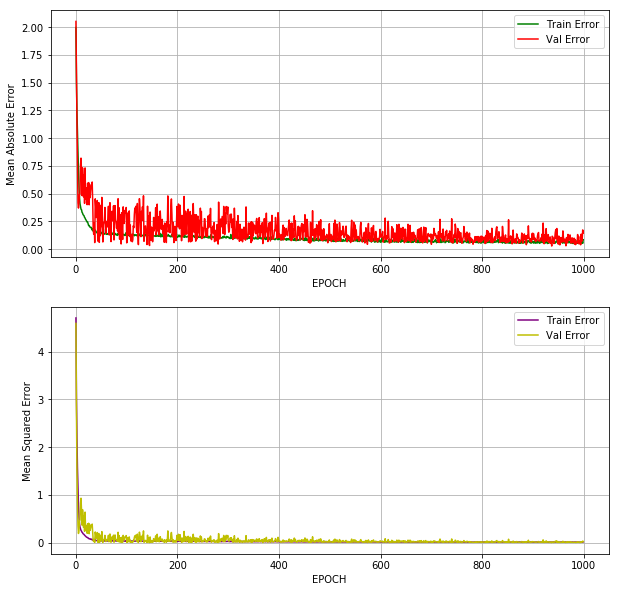

In [13]:
fig, ax = plt.subplots(2,1, figsize = (10,10))

ax[0].plot(hist['epoch'], hist['mae'], label = 'Train Error', color = 'g')
ax[0].plot(hist['epoch'], hist['val_mae'], label = 'Val Error', color = 'r')
ax[0].set_xlabel('EPOCH')
ax[0].set_ylabel('Mean Absolute Error')
ax[0].legend()
ax[0].grid()


ax[1].plot(hist['epoch'], hist['mse'], label = 'Train Error', color = 'purple')
ax[1].plot(hist['epoch'], hist['val_mse'], label = 'Val Error', color = 'y')
ax[1].set_xlabel('EPOCH')
ax[1].set_ylabel('Mean Squared Error')
ax[1].legend()
ax[1].grid()

In [14]:
model = build_model()

'''early stop adds a callback to tell the model to stop training when the validation score doesnt improve
the idea behind this is that it will increase test accuracy'''

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10) 

history1 = model.fit(norm_train, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])
hist1 = pd.DataFrame(history1.history)
hist1['epoch'] = history1.epoch


....................................................................................................
......................................................................................

In [15]:
hist1.tail(5)

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
181,0.060296,0.117292,0.027275,0.076496,0.125840,0.040724,181
182,0.066647,0.129861,0.034360,0.071598,0.140039,0.035356,182
183,0.065285,0.130402,0.032901,0.075922,0.129315,0.040601,183
184,0.060810,0.118760,0.028932,0.072011,0.136628,0.036225,184
185,0.061071,0.118926,0.029092,0.072230,0.130663,0.036921,185


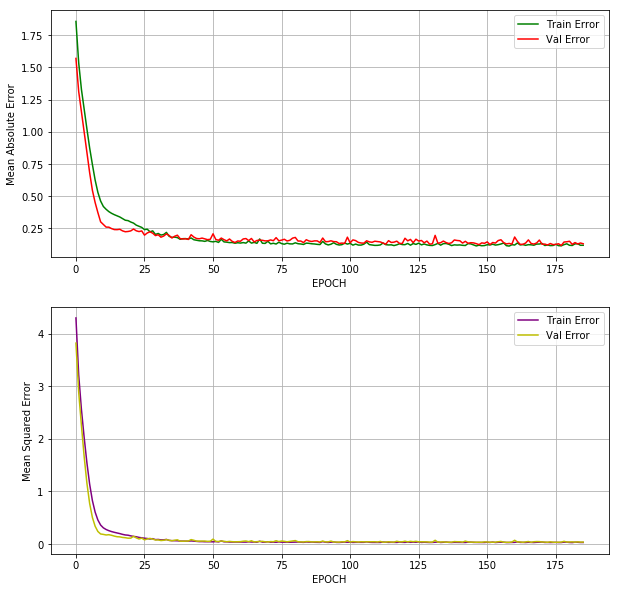

In [16]:
fig, ax = plt.subplots(2,1, figsize = (10,10))

ax[0].plot(hist1['epoch'], hist1['mae'], label = 'Train Error', color = 'g')
ax[0].plot(hist1['epoch'], hist1['val_mae'], label = 'Val Error', color = 'r')
ax[0].set_xlabel('EPOCH')
ax[0].set_ylabel('Mean Absolute Error')
ax[0].legend()
ax[0].grid()

ax[1].plot(hist1['epoch'], hist1['mse'], label = 'Train Error', color = 'purple')
ax[1].plot(hist1['epoch'], hist1['val_mse'], label = 'Val Error', color = 'y')
ax[1].set_xlabel('EPOCH')
ax[1].set_ylabel('Mean Squared Error')
ax[1].legend()
ax[1].grid()

In [17]:
loss, mae, mse= model.evaluate(norm_test, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} ".format(mae))

45/45 - 0s - loss: 0.0666 - mae: 0.1220 - mse: 0.0346
Testing set Mean Abs Error:  0.12 


In [18]:
test_predictions = model.predict(norm_test)

#sns.regplot(test_labels, test_predictions)

compare = pd.DataFrame(test_labels)

In [19]:
compare['Predict'] = np.round(test_predictions,0)

In [20]:
compare['label'] = compare['Predict']

compare['label'] = compare['label'].replace(1.0, 'iris-setosa')
compare['label'] = compare['label'].replace(2.0, 'iris-versicolor')
compare['label'] = compare['label'].replace(3.0, 'iris-virginica')

compare.shape



(45, 3)

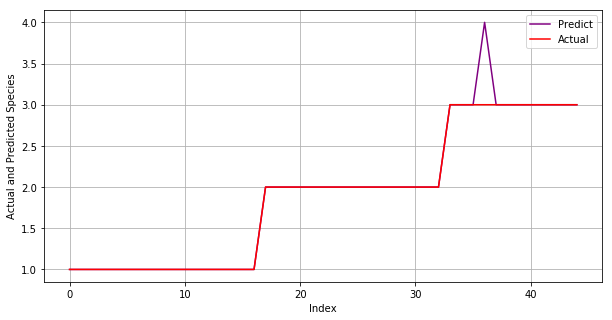

In [26]:
fig = plt.figure(figsize = (10,5))
plt.plot(np.arange(0,45,1), compare['Predict'], label = "Predict", color = 'purple')
plt.plot(np.arange(0,45,1), compare['species'],label = "Actual", color = 'red')
plt.xlabel('Index')
plt.ylabel('Actual and Predicted Species')
plt.legend()
plt.grid()


## 1 = Iris-Setosa
## 2 = Iris-Versicolor
## 3 = Iris-Virginica

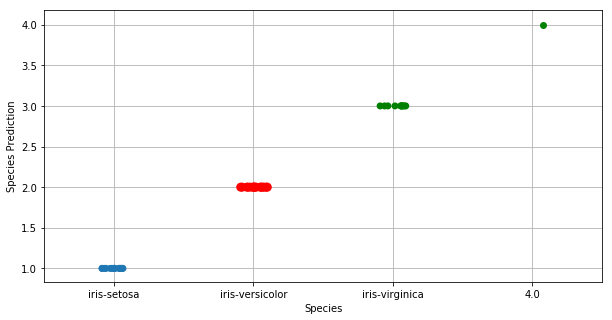

In [25]:
fig = plt.figure(figsize = (10,5))
irisS = compare[compare['species'] == 1]
irisVers = compare[compare['species'] == 2]
irisVirg = compare[compare['species'] == 3]

sns.stripplot(compare['label'], irisS['Predict'], size = 7 )
sns.stripplot(compare['label'], irisVers['Predict'], color = 'r', size =9 )
sns.stripplot(compare['label'], irisVirg['Predict'], color = 'g', size = 7)
plt.xlabel('Species')
plt.ylabel('Species Prediction')
plt.grid()


## 1 = Iris-Setosa
## 2 = Iris-Versicolor
## 3 = Iris-Virginica